In [270]:
# Imports
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import notebook
import seaborn as sns

import importlib
import msciLib
importlib.reload(msciLib)

<module 'msciLib' from '/Users/melissawilson/git/msci_ml/workspace/msciLib.py'>

In [248]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

In [249]:
# Flags 
graph = False

# Seeds
import random
random.seed(42)
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(3)

# Make Training and Test Indicies

Matrix has data from 1827 tickers and each ticker has 5 of its features included, excluding the 6th OpenInt.  

In [250]:
# Load clean matrix and tickers
matrix_3201 = np.load("matrix_3201.npy")
tickers_3201 = np.load("tickers_3201.npy")
number_of_examples = matrix_3201.shape[0]

In [251]:
# Train and test indicies
train_indicies, test_indicies = msciLib.construct_train_test_indicies(number_of_examples)

In [252]:
# Size and shape of Datasets
print("Number of examples in dataset (dates): {}".format(number_of_examples))
print("Number of examples in training set:    {}".format(len(train_indicies)))
print("Number of examples in test set:        {}".format(len(test_indicies)))

Number of examples in dataset (dates): 3201
Number of examples in training set:    1600
Number of examples in test set:        1601


# Plot 'close' for 3 Random Tickers

In [253]:
# Grab three random tickers
random.seed(42)
ticker_index1, ticker_index2, ticker_index3 = random.sample(range(0, len(tickers_3201)), 3)
print("The three tickers chosen: {}, {}, {}".format(
    tickers_3201[ticker_index1], tickers_3201[ticker_index2], tickers_3201[ticker_index3]))

The three tickers chosen: plab, bwa, ajrd


In [254]:
sns.set_style("darkgrid")

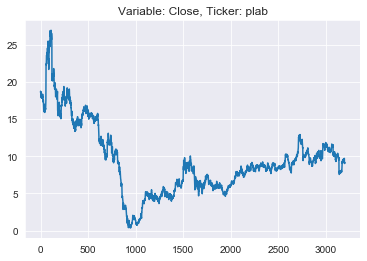

In [255]:
msciLib.plot_ticker(matrix_3201, tickers_3201, ticker_index1, "Close")

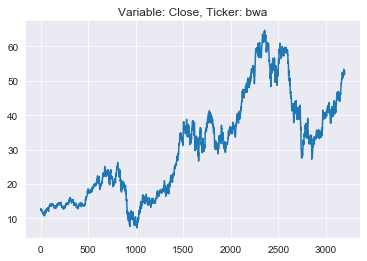

In [256]:
msciLib.plot_ticker(matrix_3201, tickers_3201, ticker_index2, "Close")

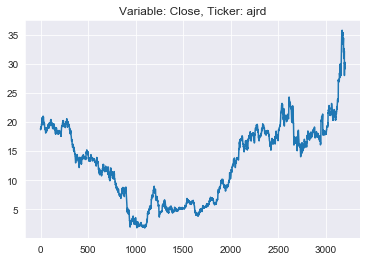

In [257]:
msciLib.plot_ticker(matrix_3201, tickers_3201, ticker_index3, "Close")

# Training of different models.

## Training for first random ticker 'plab'

In [260]:
# Make training and testing sets.
train_set, train_target, test_set, test_target = msciLib.construct_train_test_sets(matrix_3201, ticker_index1, "close")

In [261]:
# Shape of the sets
print(train_set.shape)
print(train_target.shape)
print(test_set.shape)
print(test_target.shape)

(1600, 9134)
(1600,)
(1601, 9134)
(1601,)


In [262]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=train_set.shape[1], activation='relu'))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(40, activation='relu'))
    # model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_absolute_percentage_error', 
              metrics =[metrics.mape])
    return model

In [346]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=train_set.shape[1], activation='relu'))
    model.add(Dense(100, activation='sigmoid'))
    model.add(Dense(100, activation='sigmoid'))
#     model.add(Dense(40, activation='sigmoid'))
#     model.add(Dense(40, activation='sigmoid'))
    model.add(Dense(40, activation='relu'))
    # model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_absolute_percentage_error', 
              metrics =[metrics.mape])
    return model

In [347]:
model = create_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 100)               913500    
_________________________________________________________________
dense_65 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_66 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_67 (Dense)             (None, 40)                4040      
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 41        
Total params: 937,781
Trainable params: 937,781
Non-trainable params: 0
_________________________________________________________________


In [350]:
history = model.fit(train_set, train_target, validation_data=(test_set, test_target), epochs=500, batch_size=32, 
                    verbose = False)

KeyboardInterrupt: 

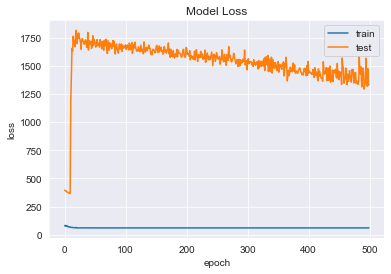

In [348]:
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
#plt.ylim(20, 2000)
#plt.xlim(10,)
plt.show()

In [349]:
# Get predictions
prediction = model.predict(test_set)

In [343]:
# Order the shuffled test_target and prediction in chronological order. 
ordered_target = np.full(number_of_examples, -1)
ordered_pred = np.full(number_of_examples, -1)

for i in np.arange(len(test_indicies)):
    ordered_target[test_indicies[i]] = test_target[i]
    ordered_pred[test_indicies[i]] = prediction[i]

(-1, 3365.782562147697)

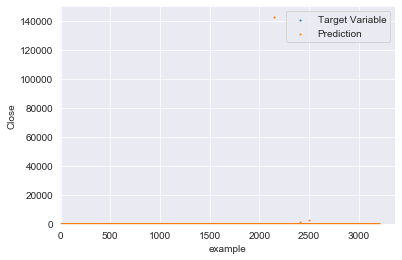

In [344]:
# Plot the target and prediction values
plt.scatter(np.arange(number_of_examples), ordered_target, s = 1)
plt.scatter(np.arange(number_of_examples), ordered_pred, s = 1)

# plt.plot(ordered_target, linewidth = 1)
# plt.plot(ordered_pred, linewidth = 1)

plt.ylabel('Close')
plt.xlabel('example')
plt.legend(['Target Variable', 'Prediction'], loc='upper right')

plt.ylim(0, )
plt.xlim(-1, )

In [345]:
msciLib.calculate_mape(test_target, prediction)

2593533.733813545

In [336]:
np.unique(prediction)

array([ 0.40557453,  0.41552994,  0.9780852 ,  1.7506578 ,  1.7506583 ,
        2.2468326 ,  3.4159968 ,  4.2428513 ,  4.4391127 ,  4.440158  ,
        4.517599  ,  4.546033  ,  4.546034  ,  5.0756702 ,  5.1431246 ,
        5.1802864 ,  5.241393  ,  5.282796  ,  5.3970413 ,  5.420513  ,
        5.425375  ,  5.534277  ,  5.6292133 ,  5.641452  ,  5.6746035 ,
        5.727216  ,  5.7360563 ,  5.82428   ,  5.8993063 ,  6.025462  ,
        6.025463  ,  6.039076  ,  6.773102  ,  6.775341  ,  7.1863165 ,
        7.258027  ,  7.5689793 ,  7.56898   ,  7.780061  ,  7.982377  ,
        8.196651  ,  8.428124  ,  8.920909  ,  9.083167  ,  9.182261  ,
        9.285353  ,  9.583189  ,  9.831621  , 11.015022  , 11.153305  ,
       11.705786  , 13.930232  , 15.442616  , 15.73626   , 16.323217  ,
       16.324116  , 16.367615  , 16.406681  , 16.408806  , 16.911442  ,
       16.984468  , 17.054665  , 17.261385  ], dtype=float32)

In [318]:
len(prediction)

1601

In [319]:
len(np.unique(prediction))

534